# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Base de dados

In [2]:
heart_failure = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

# Colunas da base de dados

In [3]:
list(heart_failure.columns) #13 colunas

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

# Estatísticas e informações iniciais

In [4]:
heart_failure.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

---

**age**                       | idade que varia entre 40 e 95

**anaemia**                   | se o paciente tem ou não anemia

**creatinine_phosphokinase**  | níveis da enzima CPK no sangue

**diabetes**                  | se o paciente tem ou não diabetes

**ejection_fraction**         | percentual de sangue que sai do coração a cada contração

**high_blood_pressure**       | se o paciente é hipertenso

**platelets**                 | plaquetas no sangue

**serum_creatinine**          | níveis de creatinina no sangue

**serum_sodium**              | níveis de sódio no sangue

**sex**                       | gênero do paciente

**smoking**                   | se o paciente fuma ou não

**time**                      | tempo decorrido

---

In [5]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


---

Não há valores nulos.

A idade deve ser convertida para int.

In [6]:
heart_failure["age"] = heart_failure["age"].apply(lambda x: int(x))

In [7]:
heart_failure["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: age
Non-Null Count  Dtype
--------------  -----
299 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


# Visualização dos dados

## Gênero

<Axes: xlabel='sex', ylabel='count'>

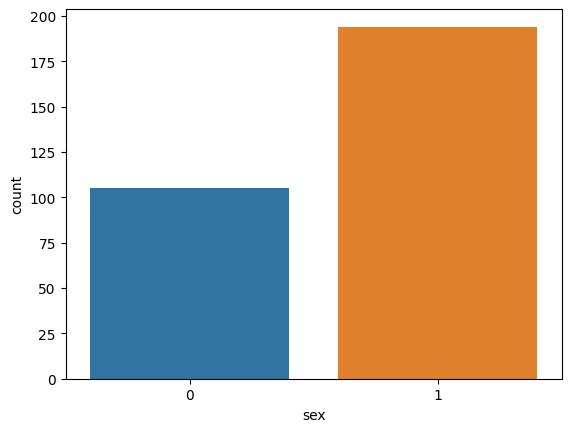

In [8]:
sns.countplot(x = heart_failure["sex"])

# 0: feminino
# 1: masculino

#predominância de pacientes do gênero masculino

## Fumante

<Axes: xlabel='smoking', ylabel='count'>

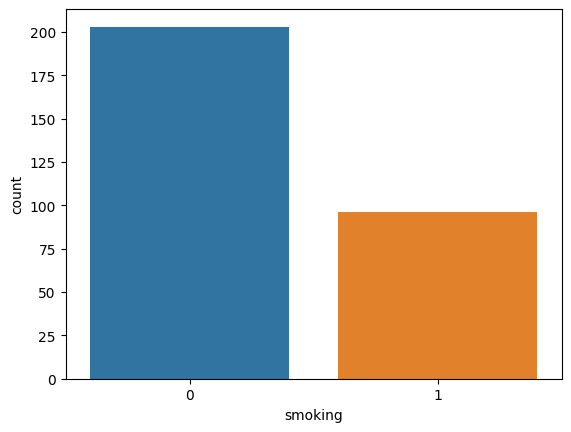

In [9]:
sns.countplot(x = heart_failure["smoking"])

#0: não fuma
#1: fuma

#predominância de pacientes que não fumam

## Anemia

<Axes: xlabel='anaemia', ylabel='count'>

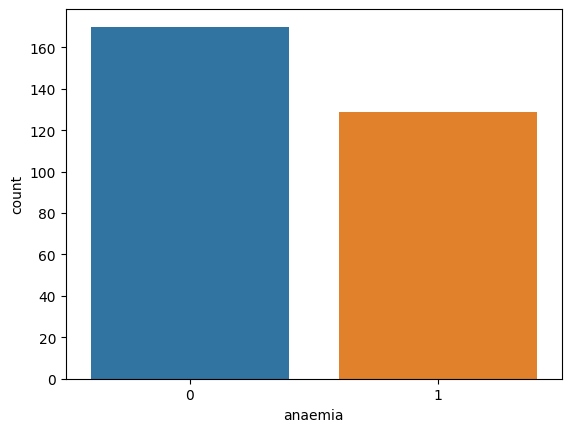

In [10]:
sns.countplot(x = heart_failure["anaemia"])

#0: não tem anemia
#1: tem anemia

#predominância de pacientes que não tem anemia

## Relação entre sobrevivência, idade e tabagismo

In [11]:
grafico = px.treemap(heart_failure, path = ["DEATH_EVENT", "age", "smoking"])
grafico

# Divisão entre previsores e classe

In [12]:
X_heart = heart_failure.iloc[:, :-1].values
y_heart = heart_failure.iloc[:, -1].values

In [13]:
X_heart

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [14]:
y_heart

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

# Escalonamento dos valores

In [15]:
scaler_heart = StandardScaler()

X_heart = scaler_heart.fit_transform(X_heart)

In [16]:
X_heart

array([[ 1.19330213e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.90895827e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.51203153e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33299481e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33299481e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.11945318e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

# Divisão das bases em treinamento e teste

In [17]:
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X_heart, 
                                                                            y_heart,
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [18]:
X_heart_train.shape, X_heart_test.shape

((239, 12), (60, 12))

In [19]:
y_heart_train.shape, y_heart_test.shape

((239,), (60,))

# Árvore de decisão

In [20]:
decision_tree_heart_failure = DecisionTreeClassifier()

In [21]:
decision_tree_heart_failure.fit(X_heart_train, y_heart_train)

DecisionTreeClassifier()

In [22]:
decision_tree_heart_failure.feature_importances_ #ganho de informação


array([0.07512138, 0.01479204, 0.03167121, 0.        , 0.11411146,
       0.02662568, 0.03615833, 0.08761002, 0.0969748 , 0.03051123,
       0.        , 0.48642385])

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

previsores = [
 'age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time'
]

figura, eixos = plt.subplots(nrows = 1, 
                             ncols = 1, 
                             figsize = (100, 100))

tree.plot_tree(decision_tree_heart_failure, 
               feature_names = previsores,
               filled = True);

# Previsões

In [33]:
previsoes = decision_tree_heart_failure.predict(X_heart_test)
previsoes

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [34]:
y_heart_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

# Acurácia do modelo

In [35]:
accuracy_score(y_heart_test, previsoes)

0.75

# Matriz de confusão

In [37]:
confusion_matrix(y_heart_test, previsoes)

array([[31,  6],
       [ 9, 14]], dtype=int64)

# Classification Report

In [38]:
print(classification_report(y_heart_test, previsoes))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.70      0.61      0.65        23

    accuracy                           0.75        60
   macro avg       0.74      0.72      0.73        60
weighted avg       0.75      0.75      0.75        60



O modelo consegue identificar 84% dos pacientes que sobreviveram; desses, consegue identificar corretamente 78%.

---

O modelo consegue identificar 61% dos pacientes que não sobreviveram; desses, consegue identificar corretamente 70%.